In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

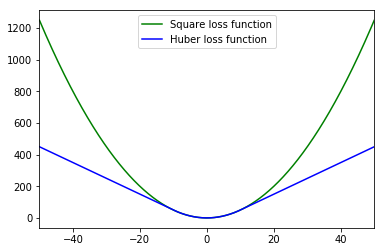

In [3]:
sigma = 10
limit = 50
X = np.arange(-limit, limit, 0.01, dtype = np.float)
y_square_loss = 0.5 * (X ** 2)
y_huber = ( (np.abs(X) <= sigma) * (0.5 * (X ** 2) ) + (np.abs(X) > sigma) * ( sigma * (np.abs(X) - 0.5 * sigma) ) )
plt.plot(X, y_square_loss, 'g')
plt.plot(X, y_huber, 'b')
plt.xlim(xmin = -limit, xmax = limit)
plt.legend(['Square loss function', 'Huber loss function'])
plt.show()

The Huber function takes a static approach to outlier detection. if difference between the estimation and the output is greater that $ \sigma $, then the data is considered as a outlier and the cost function becomes linear. Although this cost function is not used oftenly because computing the derivatives is more complex than that of the square difference function, and the function takes a static approach to outlier detection that requires the proper setting of the hyperparameter $ \delta $. A better approach would be to use outlier detection methods to eliminate outlier data points then use the simple square cost function

** Part B **

$ Y = W^{T}X + b$

$ H_\delta (y - t) = \left\{
                        \begin{array}{ll}
                       \frac{1}{2} {(y - t)}^2) \;\;\;\;\;\;\;\;\;\;\; |{y - t}| \leq \delta \\
                       \delta(|y - t| - \frac{1}{2}\delta) \;\;\;\;\; |y - t| > \delta
                       \end{array}
                       \right.
                       $
                       
$ \frac{\sigma H_\delta}{\sigma W} = \frac{\sigma H_\delta}{\sigma Y} \times \frac{\sigma Y}{\sigma W} $                   

$ \frac{\sigma H_{\delta}}{\sigma Y} = \left\{
                                              \begin{array}{ll}
                                              (y - t) \;\;\;\; |{y - t}| \leq \delta \\
                                              \delta \;\;\;\;\;\;\;\;\;\;\:  y - t > \delta \\
                                              -\delta \;\;\;\;\;\;\;\;  y - t < -\delta
                                              \end{array}
                                              \right.$    
                                              
$ \frac{\sigma Y}{\sigma W} = X $ <br>   
$ \frac{\sigma Y}{\sigma b} = 1 $
<br><br><br><br> ** So we conclude that: <br>**

$ \frac{\sigma H_{\delta}}{\sigma W} = \left\{
                                              \begin{array}{ll}
                                              (y - t)X \;\;\;\; |{y - t}| \leq \delta \\
                                              \delta X \;\;\;\;\;\;\;\;\;\;\:  y - t > \delta \\
                                              -\delta X \;\;\;\;\;\;\;\;  y - t < -\delta
                                              \end{array}
                                              \right.$
                                              
<br>
$ \frac{\sigma H_{\delta}}{\sigma b} = \left\{
                                              \begin{array}{ll}
                                              (y - t) \;\;\;\; |{y - t}| \leq \delta \\
                                              \delta \;\;\;\;\;\;\;\;\;\;\:  y - t > \delta \\
                                              -\delta \;\;\;\;\;\;\;\;  y - t < -\delta
                                              \end{array}
                                              \right.$    
                                              


## Question 2
  
  were gonna separate the two data points below using the perceptron learning algorithm.
  
  |$X_1$|$X_2$|t|
  |-----|--|-|
  | 1 | -2 | 1 |
  | 0 | -1 | -1|

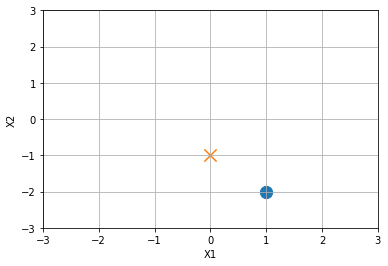

In [4]:
learning_rate = 0.1
marker_map = {-1 : 'x', 1 : 'o'}
data_points = np.array([[1, -2, 1], [0, -1, -1]], dtype = np.float)
plt.xlabel('X1')
plt.ylabel('X2')
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.xticks(np.arange(-3, 4, 1))
plt.yticks(np.arange(-3, 4, 1))
for data_point in data_points:
    plt.scatter(data_point[0], data_point[1], marker=marker_map[data_point[2]], s=150)
plt.grid()
plt.show()

** Im gonna perform learning in 100 steps and a learning rate of 0.01 to make things more exciting :) **

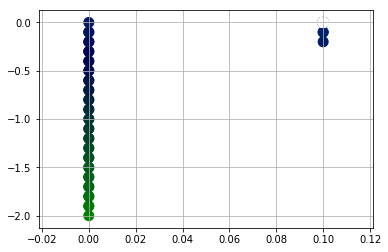

[1.00000000e-01 6.38378239e-16]


In [5]:
W = [0, -2]
steps = 100
new_weights = np.zeros(shape=(steps, 2), dtype = np.float)
t = np.arange(steps)
for i in range(steps):
    point = int(i % 2)
    X = data_points[point, 0 : 2]
    Y = data_points[point, 2]
    pred = np.sum(np.multiply(X , W))
    if Y == 1 and pred < 0:
        W = W + X * learning_rate
    elif Y == -1 and pred >= 0:
        W = W - X * learning_rate
    new_weights[i] = W
plt.scatter(new_weights[:,0], new_weights[:,1], s=steps, c=t, cmap="ocean")
plt.grid()
plt.show()
print(W)

** The points above represent how our weights are moving as the learning procedure goes on. (light blue to green) **


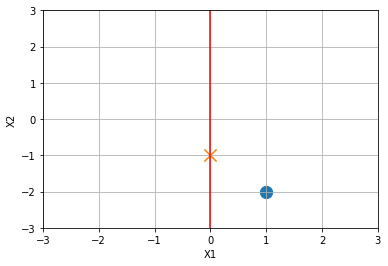

In [6]:
plt.xlabel('X1')
plt.ylabel('X2')
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.xticks(np.arange(-3, 4, 1))
plt.yticks(np.arange(-3, 4, 1))
for data_point in data_points:
    plt.scatter(data_point[0], data_point[1], marker=marker_map[data_point[2]], s=150)
plt.grid()
input_range = np.arange(-5, 5, 0.01, dtype = np.float)
output = (-W[0] * input_range) / W[1]
plt.plot(input_range, output, 'r')
plt.show()

** This is the line we get after performing learning with a learning rate of 0.1 **

## Question 3
  
  consider the following loss function: $$ L(y, t) = 1 - cos(y - t) $$ <br> and a linear regression model where the relation between input and output is:<br><br> $$ y = W^TX + b $$ so the cost function would be: <br><br> $$ \epsilon = \frac{1}{N} \sum_{i=1}^{N} L(y^{(i)}{t^{(i)}})$$ <br> Were Gonna compute the derivatives of the cost function with respect to our parameters. <br><br>
  $$\epsilon = \frac{1}{N} \sum_{i=1}^{N} 1 - cos(y - t) \\ $$
  $$ \frac{\sigma\epsilon}{\sigma y} = \frac{1}{N} \sum_{i=1}^N 1 + sin(y - t) $$
  $$ \frac{\sigma \epsilon}{\sigma W} = \frac{\sigma \epsilon}{\sigma y} \times \frac{\sigma y}{\sigma W} =
  \frac{1}{N} (1 + sin(y - t))X $$
  
  $$ \frac{\sigma \epsilon}{\sigma b} = \frac{\sigma \epsilon}{\sigma y} $$
  

## Question 4
  
  design a neural network with four inputs, three hidden units and hard threshold activation units at each layer. we want this neural network to decide if an input array with size four is sorted or not, and manually set the weights so that the network would be able to properly solve this problem.  
  lets brake the problem into three subproblems and make each neuron solve one subproblem. so the problem is whether $ X_1 \leq X_2 \leq X_3 \leq X_4 $ and we are gonna break it into the three subproblems: $X_1 \leq X_2 , \;\; X_2 \leq X_3 , \;\; X_3 \leq X_4$ each neuron will solve one subproblem and the final neuron will decide if all three conditions are satisfied.  
  so the neuron should output 1 if $X_1 - X_2 \leq 0$ and 0 otherwise. in other terms : $X_2 - X_1 \geq 0 $ so the weights for our first neuron should be : $[-1, 1, 0, 0]$. the second and third neurons work quite the same. the final weight matrix will look something like this: <br><br> 
   $$W_1=
  \left[ {\begin{array}{ccc}
   -1 & 1 & 0 & 0\\
   0 & -1 & 1 & 0\\
   0 & 0 & -1 & 1
  \end{array} } \right] $$  
  and we have $b_1 = [0, 0, 0]$ <br>
  on the second layer we have $W_2 = [1, 1, 1]$ and the bias can be anything between -3 and -2 $(-3\leq b < -2)$